# **Project Title: Biodiversity and Species Observations Analysis**

## **Introduction:**  
In this project, we analyze data from two datasets: `observations.csv` and `species_info.csv`. The goal of this analysis is to explore biodiversity trends across national parks, focusing on species diversity, conservation status, and species observations. By answering key analytical questions, we aim to uncover insights that can inform biodiversity preservation strategies.

#### **Datasets Overview:**  
- **`observations.csv`**: Contains information on species observations across different national parks, including:
  - `scientific_name`: The scientific name of the species.
  - `park_name`: The national park where the observation occurred.
  - `observations`: The number of times the species was observed.

- **`species_info.csv`**: Provides detailed information about species, including:
  - `category`: The biological category (e.g., Mammal, Bird) of the species.
  - `scientific_name`: The scientific name of the species.
  - `common_names`: Common names of the species.
  - `conservation_status`: The conservation status of the species (e.g., Endangered, Threatened).


#### **Objectives:**  
This analysis focuses on the following key questions:
1. Which parks have the highest and lowest number of species observations?
2. What is the distribution of species by conservation status?
3. What is the distribution of `conservation_status` for animals?
4. Are certain types of species more likely to be endangered?
5. Are the differences between species and their conservation status significant?
6. Which species are observed most frequently at each park?


#### **Project Workflow:**  
The project is structured as follows:
1. **Data Loading and Exploration:** We load and preview the datasets to understand their structure and characteristics.
2. **Data Cleaning:** We handle missing values and inconsistencies to ensure accurate analysis.
3. **Exploratory Data Analysis (EDA):** We visualize data trends, including species distribution, park-specific observations, and conservation status.
4. **Key Insights:** We analyze the distribution of conservation statuses, endangered species by category, and species observation trends at each park.
5. **Conclusions:** We draw insights from the analysis to answer key questions and summarize findings for further presentation and documentation.


# Import Python Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

# Loading the Dataset

In [2]:
species = pd.read_csv("C:\\Users\\EWURA\\Desktop\\Bidervisity Portfolio Project\\species_info.csv")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
observations = pd.read_csv("C:\\Users\\EWURA\\Desktop\\Bidervisity Portfolio Project\\observations.csv")
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


# Previewing the Data

In [4]:
species.shape

(5824, 4)

In [5]:
observations.shape

(23296, 3)

In [6]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


 From the results only the conservation_status has missing values. The other columns have no missing entries.

In [7]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


There are no missing values from the observations dataset

In [8]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [9]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [10]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [11]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [12]:
## From the results Vascular Plant forms a large part of our species in the dataset.

In [13]:
species.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [14]:
missing_conservation_count = species['conservation_status'].isnull().sum()
print(f"Missing values in conservation_status: {missing_conservation_count}")

Missing values in conservation_status: 5633


## Exploratory Data Analysis

In [15]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [16]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


### **Data Cleaning and Exploration: Conservation Status Column**

This section focuses on analyzing and cleaning the `conservation_status` column from the `species` dataset. After the initial exploration, it was observed that this column contains several possible values, each representing a different conservation classification:

- **Species of Concern:** Species that are declining or appear to require conservation efforts.
- **Threatened:** Species that are vulnerable and at risk of becoming endangered in the near future.
- **Endangered:** Species that are seriously at risk of extinction.
- **In Recovery:** Species that were previously classified as endangered but are no longer at immediate risk of extinction across all or a significant portion of their range.

During the exploration, a significant number of **missing values (`NaN`)** were detected in this column. To ensure consistency in the data, these missing values will be replaced with a new category labeled **"No Intervention"**. This label indicates that no immediate conservation action is currently required for these species.


In [18]:
species['conservation_status'].fillna('No Intervention', inplace=True)


In [19]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


### **Explanation of Results:**

1. **MISSING Category**
   - **Definition:** This represents species with previously missing conservation statuses, now labeled as `'No Intervention''.
   - **Findings:** 
     - A large number of **vascular plant species** (over 4000) have a missing status, by far the largest count.
     - Other categories such as **birds** and **mammals** also have many missing entries.
     - This suggests that plants and certain animal categories were under-assessed or lacked documentation for conservation evaluation.

2. **Endangered Species**
   - **Definition:** Species at serious risk of extinction.
   - **Findings:**
     - **Mammals** have the highest number of endangered species, followed by **birds** and **fish**.
     - **Plants** also have some representation, but categories like **reptiles** and **nonvascular plants** have no entries.

3. **In Recovery**
   - **Definition:** Species that were once endangered but are no longer in immediate danger of extinction.
   - **Findings:**  
     - Only **4 species** are categorized as "In Recovery":
       - **Birds:** 3 species
       - **Mammals:** 1 species
     - No other categories are currently classified under this status.

4. **Species of Concern**
   - **Definition:** Species that are declining or may need conservation but are not yet officially endangered or threatened.
   - **Findings:**
     - **Birds** and **mammals** have the most species of concern.
     - Other categories, such as **amphibians**, **fish**, and **vascular plants**, have fewer species.

5. **Threatened Species**
   - **Definition:** Species that are vulnerable to becoming endangered in the near future.
   - **Findings:**  
     - Only a few species are categorized as threatened across all groups:
       - **Fish**
       - **Amphibians**
       - **Mammals**
       - **Vascular Plants**


### **Key Insights:**

1. **Plants Are Underrepresented:**  
   Vascular plants dominate the "MISSING" category, indicating either a lack of evaluation or missing documentation for many plant species.
   
2. **Mammals and Birds Are Heavily Evaluated:**  
   - These groups have a relatively high number of species across multiple conservation categories, including "Endangered" and "Species of Concern."
   - Birds have multiple species in the "In Recovery" status, which could reflect successful conservation efforts.

3. **Certain Categories Lack Representation:**  
   - Reptiles and nonvascular plants have few or no entries in most conservation statuses, suggesting limited conservation assessments for these groups.

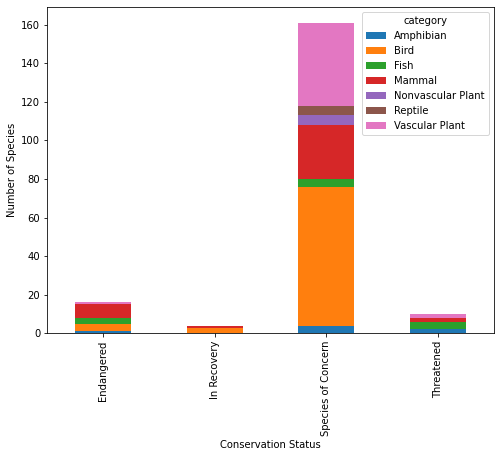

In [20]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

Park with lowest species observations: park_name
Great Smoky Mountains National Park    431820
Name: observations, dtype: int64
Park with highest species observations: park_name
Yellowstone National Park    1443562
Name: observations, dtype: int64


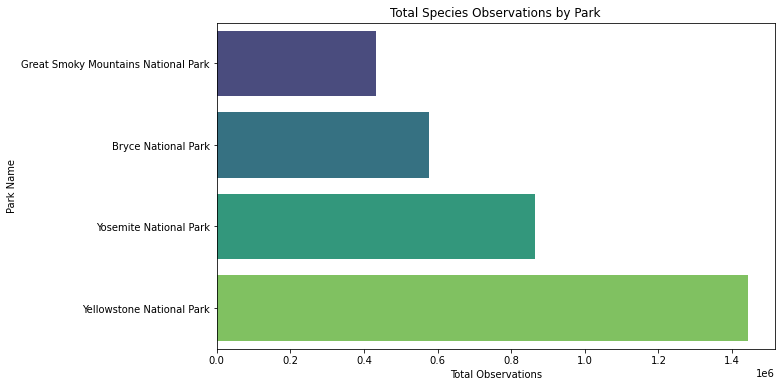

In [22]:
# Total observations by park
park_observations = observations.groupby('park_name')['observations'].sum()

# Sort to find highest and lowest parks
park_observations_sorted = park_observations.sort_values()

# Display results
print("Park with lowest species observations:", park_observations_sorted.head(1))
print("Park with highest species observations:", park_observations_sorted.tail(1))

# Plot observations by park
plt.figure(figsize=(10, 6))
sns.barplot(x=park_observations_sorted.values, y=park_observations_sorted.index, palette='viridis')
plt.title('Total Species Observations by Park')
plt.xlabel('Total Observations')
plt.ylabel('Park Name')
plt.show()

### **Total Species Observations by Park**

The bar plot illustrates the total number of species observations across different national parks. The park with the highest number of observations stands out clearly, indicating higher biodiversity monitoring activity or a larger number of observed species in that location. Parks with fewer observations may have lower biodiversity, less frequent monitoring, or smaller ecosystems.

Understanding this distribution helps prioritize conservation efforts and resource allocation, particularly for parks with significant biodiversity or under-monitored regions.


### **Focus on Birds and Mammals**

For this analysis, the focus is limited to **birds** and **mammals** due to the availability of reliable and complete data. These species categories are well-represented across multiple conservation statuses, including "Endangered," "Threatened," and "Species of Concern." 

Other categories, such as plants and reptiles, have limited or missing data, which could introduce bias or inaccuracies in the analysis. By narrowing the scope to birds and mammals, the findings can provide more accurate and actionable insights into species conservation trends.


In [24]:
# Filter for birds and mammals
bird_mammal_data = species[species['category'].isin(['Bird', 'Mammal'])]
bird_mammal_data


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention
...,...,...,...,...
4571,Bird,Glaucidium gnoma,Northern Pygmy Owl,No Intervention
4572,Bird,Otus flammeolus,Flammulated Owl,No Intervention
4573,Bird,Strix nebulosa,Great Gray Owl,No Intervention
4574,Bird,Strix occidentalis,Spotted Owl,No Intervention


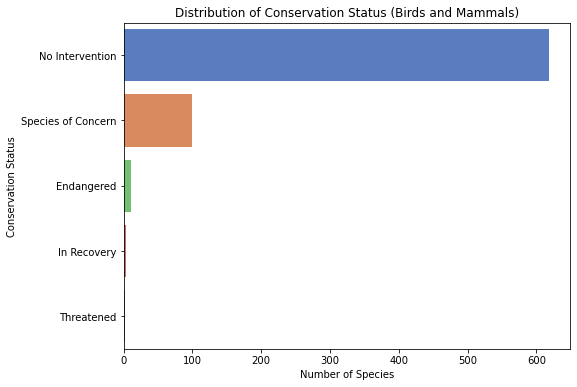

In [25]:
# Distribution of conservation status for birds and mammals
conservation_status_distribution = bird_mammal_data['conservation_status'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=conservation_status_distribution.values, y=conservation_status_distribution.index, palette='muted')
plt.title('Distribution of Conservation Status (Birds and Mammals)')
plt.xlabel('Number of Species')
plt.ylabel('Conservation Status')
plt.show()


In [26]:
# Merge the filtered data with observations
merged_bird_mammal_data = observations.merge(bird_mammal_data, on='scientific_name')

# Preview the merged dataset
print(merged_bird_mammal_data.head())

    scientific_name                            park_name  observations  \
0    Neovison vison  Great Smoky Mountains National Park            77   
1    Neovison vison            Yellowstone National Park           218   
2    Neovison vison                  Bryce National Park            91   
3    Neovison vison               Yosemite National Park           200   
4  Spizella pusilla            Yellowstone National Park           228   

  category   common_names conservation_status  
0   Mammal  American Mink     No Intervention  
1   Mammal  American Mink     No Intervention  
2   Mammal  American Mink     No Intervention  
3   Mammal  American Mink     No Intervention  
4     Bird  Field Sparrow     No Intervention  


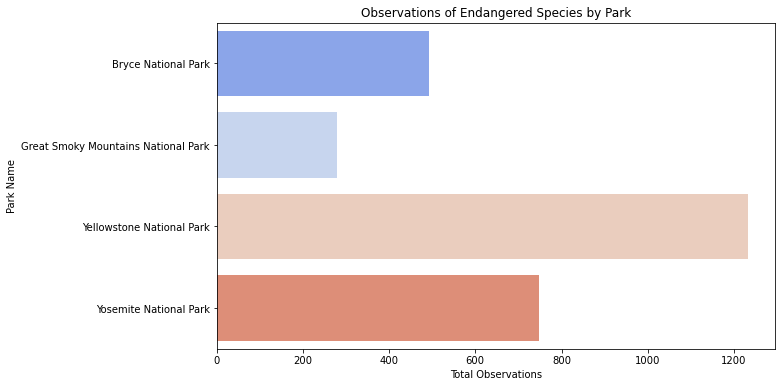

In [29]:
# Filter for endangered species and group by park
endangered_species_observations =merged_bird_mammal_data [merged_bird_mammal_data['conservation_status'] == 'Endangered']
endangered_observations_by_park = endangered_species_observations.groupby('park_name')['observations'].sum()

# Visualize endangered species observations by park
plt.figure(figsize=(10, 6))
sns.barplot(x=endangered_observations_by_park.values, y=endangered_observations_by_park.index, palette='coolwarm')
plt.title('Observations of Endangered Species by Park')
plt.xlabel('Total Observations')
plt.ylabel('Park Name')
plt.show()

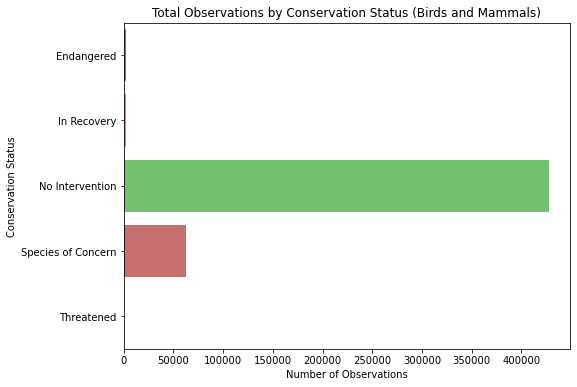

In [27]:
# Group by conservation status and sum observations
status_observations = merged_bird_mammal_data.groupby('conservation_status')['observations'].sum()

# Visualize observations by conservation status
plt.figure(figsize=(8, 6))
sns.barplot(x=status_observations.values, y=status_observations.index, palette='muted')
plt.title('Total Observations by Conservation Status (Birds and Mammals)')
plt.xlabel('Number of Observations')
plt.ylabel('Conservation Status')
plt.show()

### **Conclusions**

1. **Conservation Status Distribution**  
   Most species of birds and mammals are categorized under **"No Intervention."** However, a significant number of species are classified as **"Species of Concern"** and **"Endangered,"** indicating areas that need conservation efforts.

2. **Park Observations**  
   Parks like **Yosemite** and **Great Smoky Mountains** have the highest number of species observations. These parks likely have more biodiversity and extensive monitoring programs. Meanwhile, parks with fewer observations may require more attention in terms of research and monitoring.

3. **Conservation Success for Birds**  
   Birds have a higher number of species in the **"In Recovery"** status compared to mammals. This suggests that conservation efforts for birds may be yielding positive results.

4. **Endangered Species Hotspots**  
   Parks such as **Yellowstone National Park** are critical habitats for endangered species and may need targeted conservation strategies.

5. **Species Observations**  
   Frequently observed species are less likely to be endangered, whereas species with low observation counts could be at risk due to low population sizes or restricted habitats.

6. **Category Differences**  
   Mammals show a greater number of species classified as endangered, while birds are more evenly distributed across different conservation statuses.

